In [1]:
import numpy as np
import tensorflow.keras as keras
import tensorflow.keras.utils
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os.path

The first thing to do is to create a dataset, by linking the images to the name of each algae:

In [5]:
#address of the base folder:
base = "R:\\3.Masters_projects\\2021_Dominic_Rebindaine\\ROI"
#extract the name from the file name:
name_l =[]
path_l = []
for fname in os.listdir(base):
    pathto = os.path.join(base,fname)
    
    if os.path.isdir(pathto):
        path_l.append(pathto)
        split = fname.split(sep='_')
        name = split[1]
        name_l.append(name)

In [6]:
#group identical labels together:
label_name, label = np.unique(name_l,return_inverse=True)

In [7]:
#define the input data:
size = 200

In [8]:
#create a generator, consider that the images are two level below:
def data_generator(path_l=path_l, label=label):
    for idx,path in enumerate(path_l):
        y =label[idx]
        for subfold in os.listdir(path):
            subpath = os.path.join(path,subfold)
            if os.path.isdir(subpath):
                for imgname in os.listdir(subpath):
                    imgpath = os.path.join(subpath,imgname)
                    if '.png' in imgname:
                        img= plt.imread(imgpath)
                        img_resized = tf.image.resize(img,(size,size))
                        yield img_resized, y


In [15]:
dataset = tf.data.Dataset.from_generator(data_generator,
                                         output_signature = (tf.TensorSpec((size,size,3), dtype=tf.dtypes.float32),
                                                             tf.TensorSpec((),dtype=tf.dtypes.int32)))
dataset = dataset.shuffle(10000)
dataset = dataset.batch(32)


In [16]:
i = 0
label = []
for X,y in dataset:
    i+=1
    print(i,end='\r')
    label = tf.concat([label,y],axis=0)
    if i > 100:
        break

KeyboardInterrupt: 

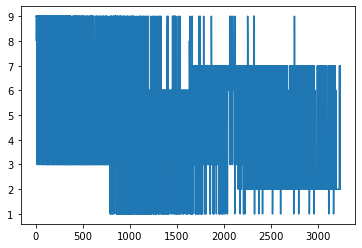

In [14]:
plt.plot(label)


In [ ]:
base

In [11]:
ds = tf.data.Dataset.list_files('R:\\3.Masters_projects\\2021_Dominic_Rebindaine\\ROI\\*\\*\\*.png')

In [17]:
dsimg = tf.data.Dataset.from_tensors(ds)

In [18]:
for x in dsimg:
    print(x)

<_VariantDataset shapes: (), types: tf.string>
